In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
data=pd.read_csv('train.csv')
data['TotArea']= data['GrLivArea'] + data['1stFlrSF'] + data['GarageArea'] + data['TotalBsmtSF']
data

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice,TotArea
0,7,1820,1,240,1026,1133,2,8,1925,1950,184000,4219
1,7,1646,1,240,918,918,2,7,1941,1950,164000,3722
2,5,1316,2,484,926,926,1,6,1929,2001,130000,3652
3,10,2402,3,672,3094,2402,2,10,2008,2008,555000,8570
4,7,1253,2,402,1237,1253,2,6,1995,1996,176000,4145
...,...,...,...,...,...,...,...,...,...,...,...,...
1163,6,1400,2,440,672,672,1,6,1978,1978,149500,3184
1164,7,1472,2,402,384,802,2,7,1991,1992,160000,3060
1165,5,789,1,250,789,789,1,5,1948,1950,115000,2617
1166,6,1661,1,377,992,1661,1,8,1955,1996,165500,4691


In [49]:
data.corr()['SalePrice']

OverallQual     0.787325
GrLivArea       0.707904
GarageCars      0.643677
GarageArea      0.643247
TotalBsmtSF     0.608507
1stFlrSF        0.603542
FullBath        0.560434
TotRmsAbvGrd    0.530472
YearBuilt       0.525857
YearRemodAdd    0.497762
SalePrice       1.000000
TotArea         0.779922
Name: SalePrice, dtype: float64

In [50]:
from copy import deepcopy
saleprice= data['SalePrice']
data = data.drop(['SalePrice'],axis=1)
data['saleprice']= saleprice
data


,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,TotArea,saleprice
0,7,1820,1,240,1026,1133,2,8,1925,1950,4219,184000
1,7,1646,1,240,918,918,2,7,1941,1950,3722,164000
2,5,1316,2,484,926,926,1,6,1929,2001,3652,130000
3,10,2402,3,672,3094,2402,2,10,2008,2008,8570,555000
4,7,1253,2,402,1237,1253,2,6,1995,1996,4145,176000
...,...,...,...,...,...,...,...,...,...,...,...,...
1163,6,1400,2,440,672,672,1,6,1978,1978,3184,149500
1164,7,1472,2,402,384,802,2,7,1991,1992,3060,160000
1165,5,789,1,250,789,789,1,5,1948,1950,2617,115000
1166,6,1661,1,377,992,1661,1,8,1955,1996,4691,165500


<function matplotlib.pyplot.show(close=None, block=None)>

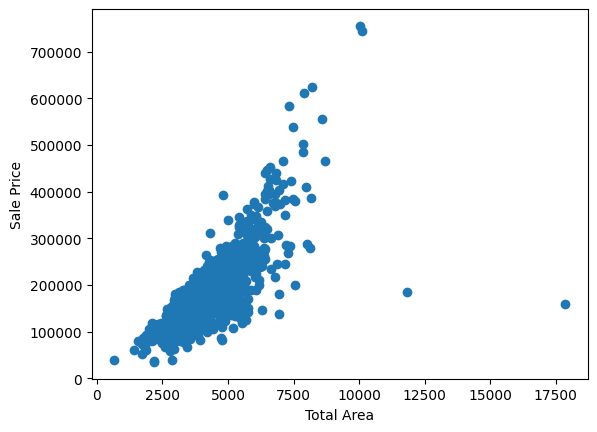

In [51]:
plt.scatter(data['TotArea'], data['saleprice'])
plt.xlabel('Total Area')
plt.ylabel('Sale Price')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

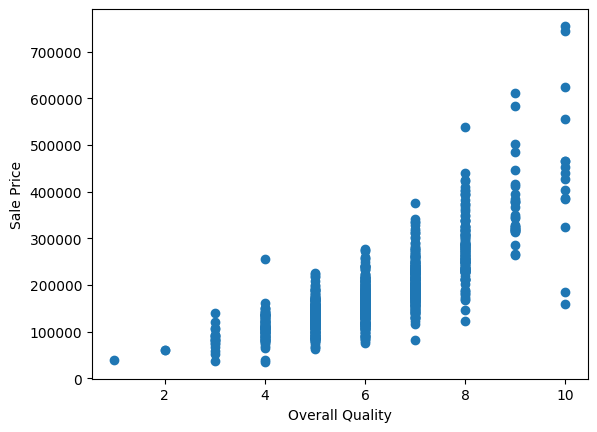

In [52]:
plt.scatter(data['OverallQual'], data['saleprice'])
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show

In [53]:
data_np = data.to_numpy()
data_np.shape

(1168, 12)

In [54]:
X_train, y_train = data_np[:,:11], data_np[:,-1]
X_train.shape, y_train.shape

((1168, 11), (1168,))

In [55]:
def get_predictions(model,X):
    (n,p_minus_one)= X.shape
    p = p_minus_one + 1

    new_X=np.ones(shape=(n,p))
    new_X[:,1:] = X

    return np.dot(new_X,model)

In [56]:
from numpy.linalg import inv

def get_best_model(X,y):
    (n,p_minus_one)=X.shape
    p= p_minus_one + 1

    new_X=np.ones(shape=(n,p))
    new_X[:,1:] = X

    return np.dot(np.dot(inv(np.dot(new_X.T, new_X)),new_X.T),y)